In [194]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [195]:
df_admissions = pd.read_csv('Admission_predict.csv')
df = df_admissions.drop(['Serial No.'], axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,1
1,324,107,4,4.000000,4.500000,8.870000,1,1
2,316,104,3,3.000000,3.500000,8.000000,1,0
3,322,110,3,3.500000,2.500000,8.670000,1,1
4,314,103,2,2.000000,3.000000,8.210000,0,0


In [196]:
df.shape

(400, 8)

In [197]:
x = df.drop('Chance of Admit',axis = 1)
y = df['Chance of Admit']

In [198]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
model = DecisionTreeClassifier(random_state=1)
model.fit(xtrain, ytrain)
ytest_pred = model.predict(xtest)
accuracy_score(ytest, ytest_pred)

0.825

In [201]:
model.score(xtrain,ytrain)

1.0

In [202]:
model.score(xtest,ytest)

0.825

In [203]:
model.tree_.max_depth

14

In [204]:
from sklearn import tree

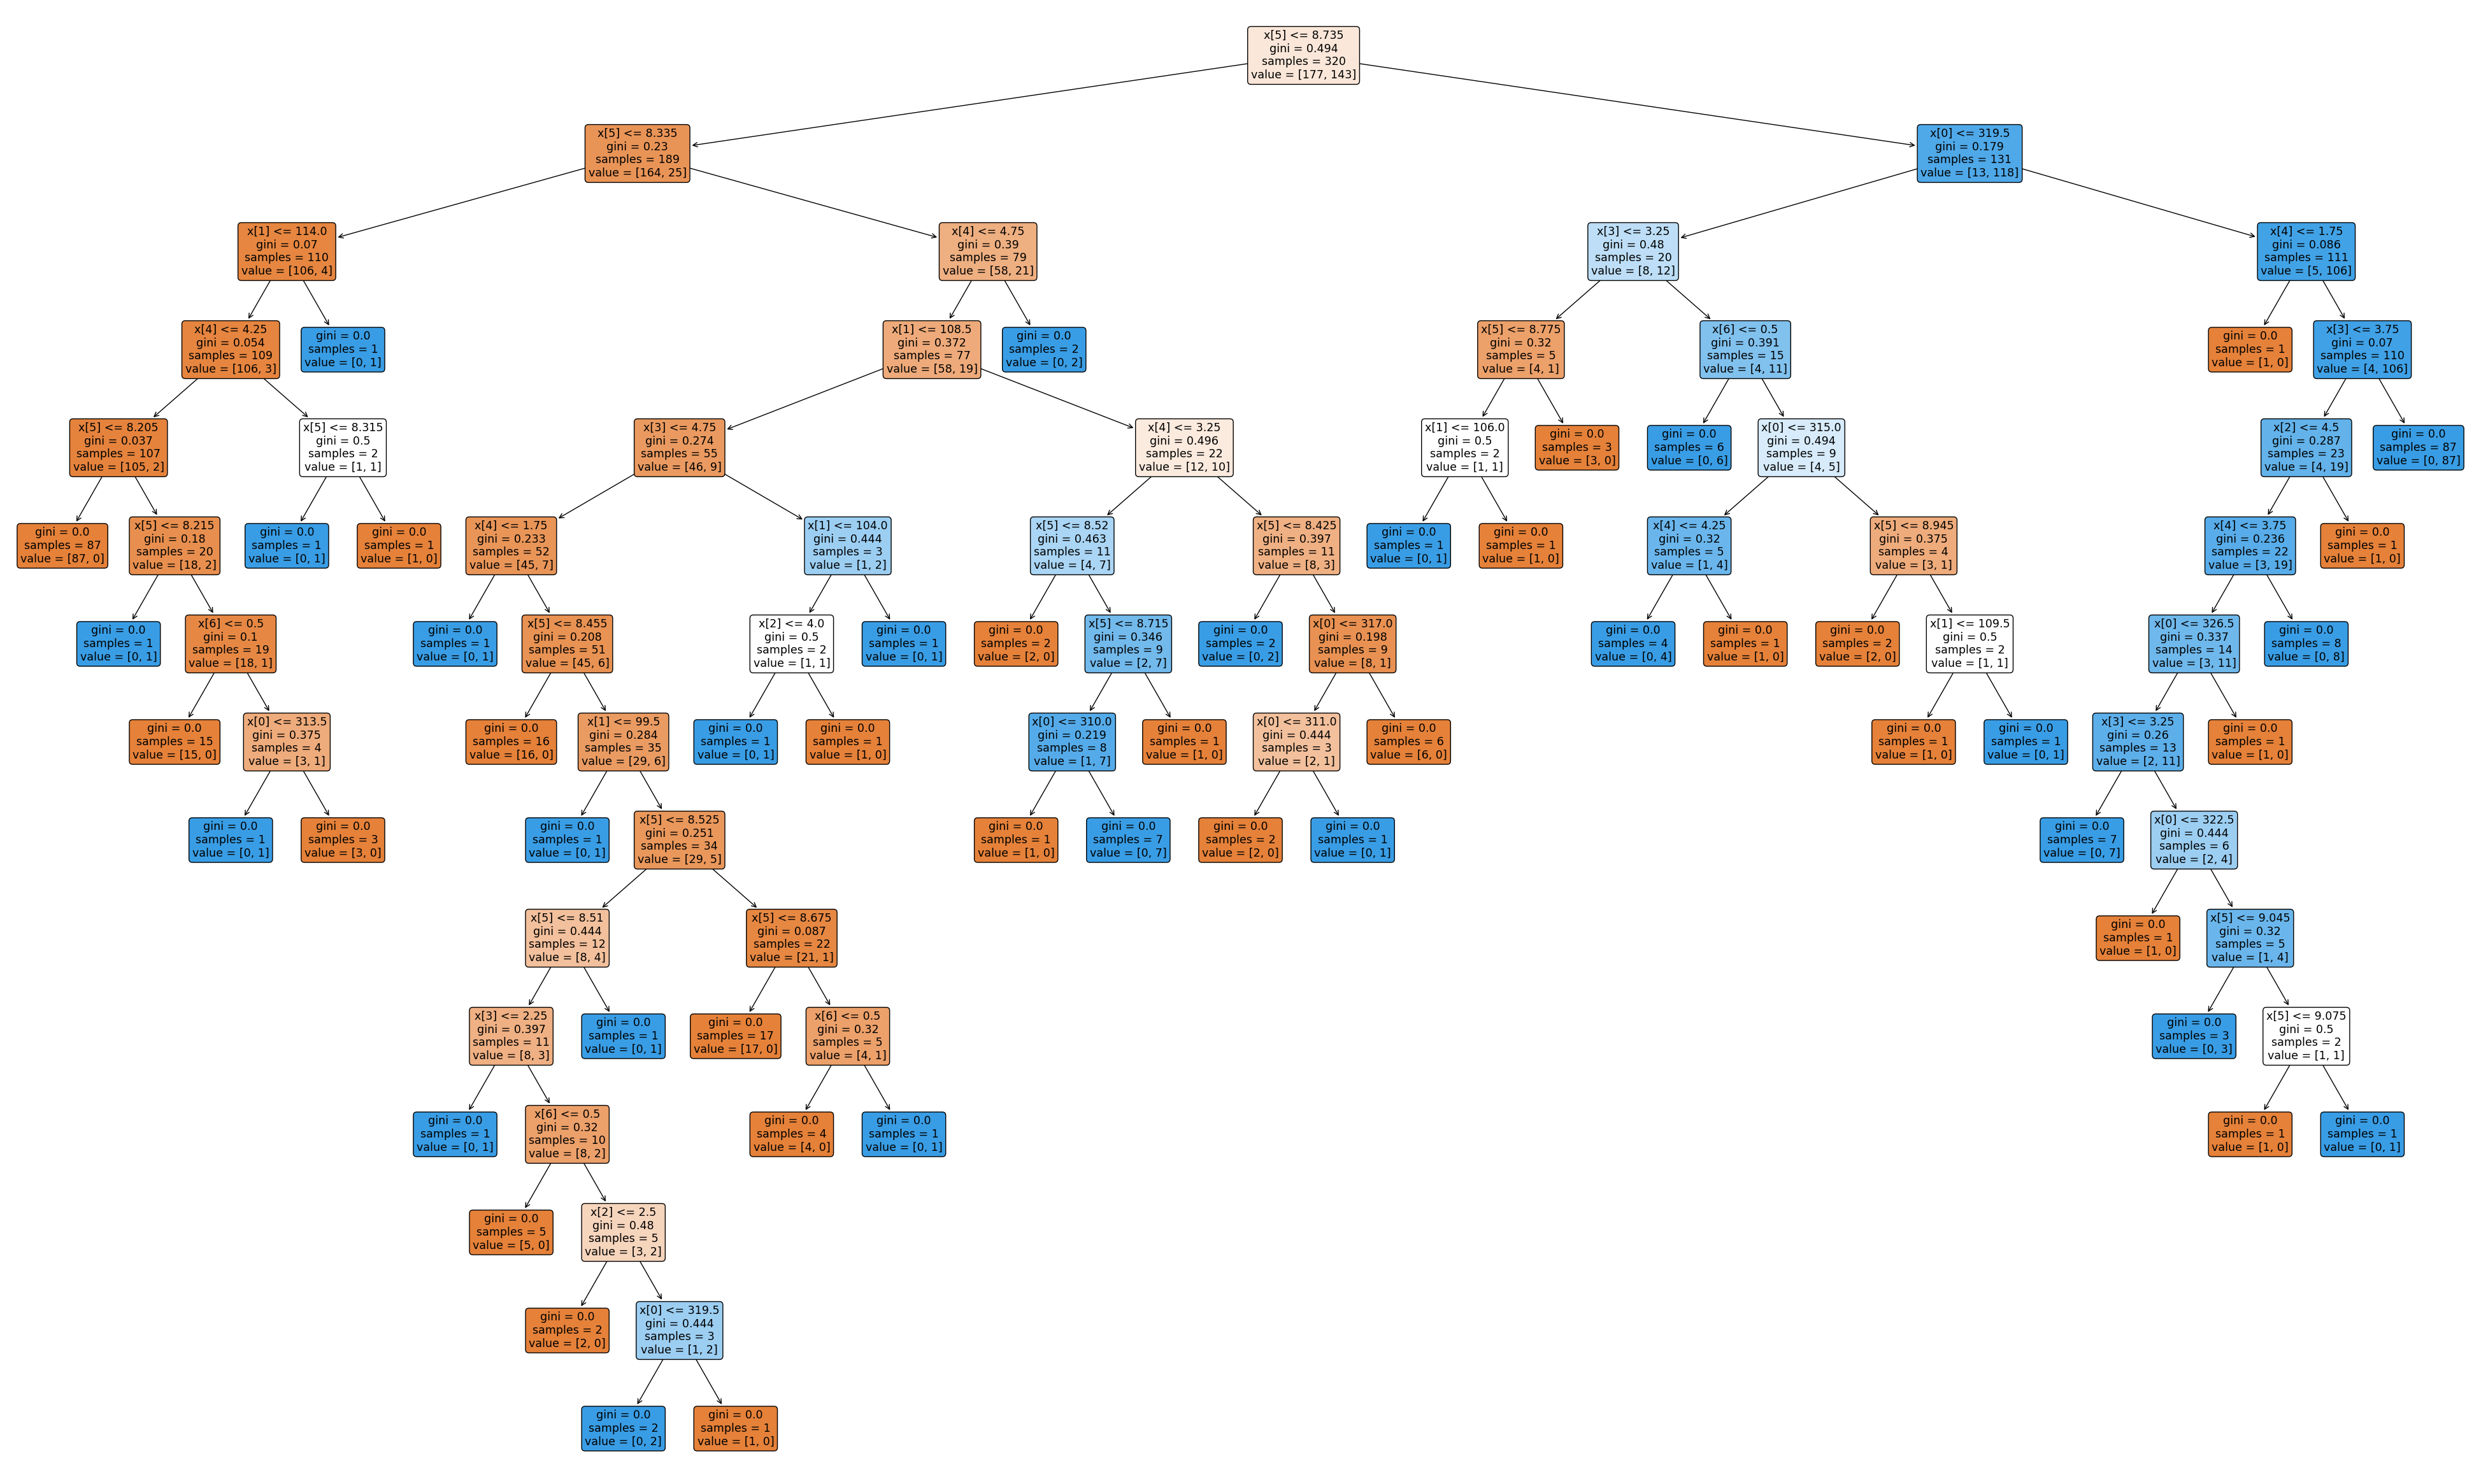

In [205]:
plt.figure(figsize = (50,30))
tree.plot_tree(model, rounded = True, filled = True)
plt.show()

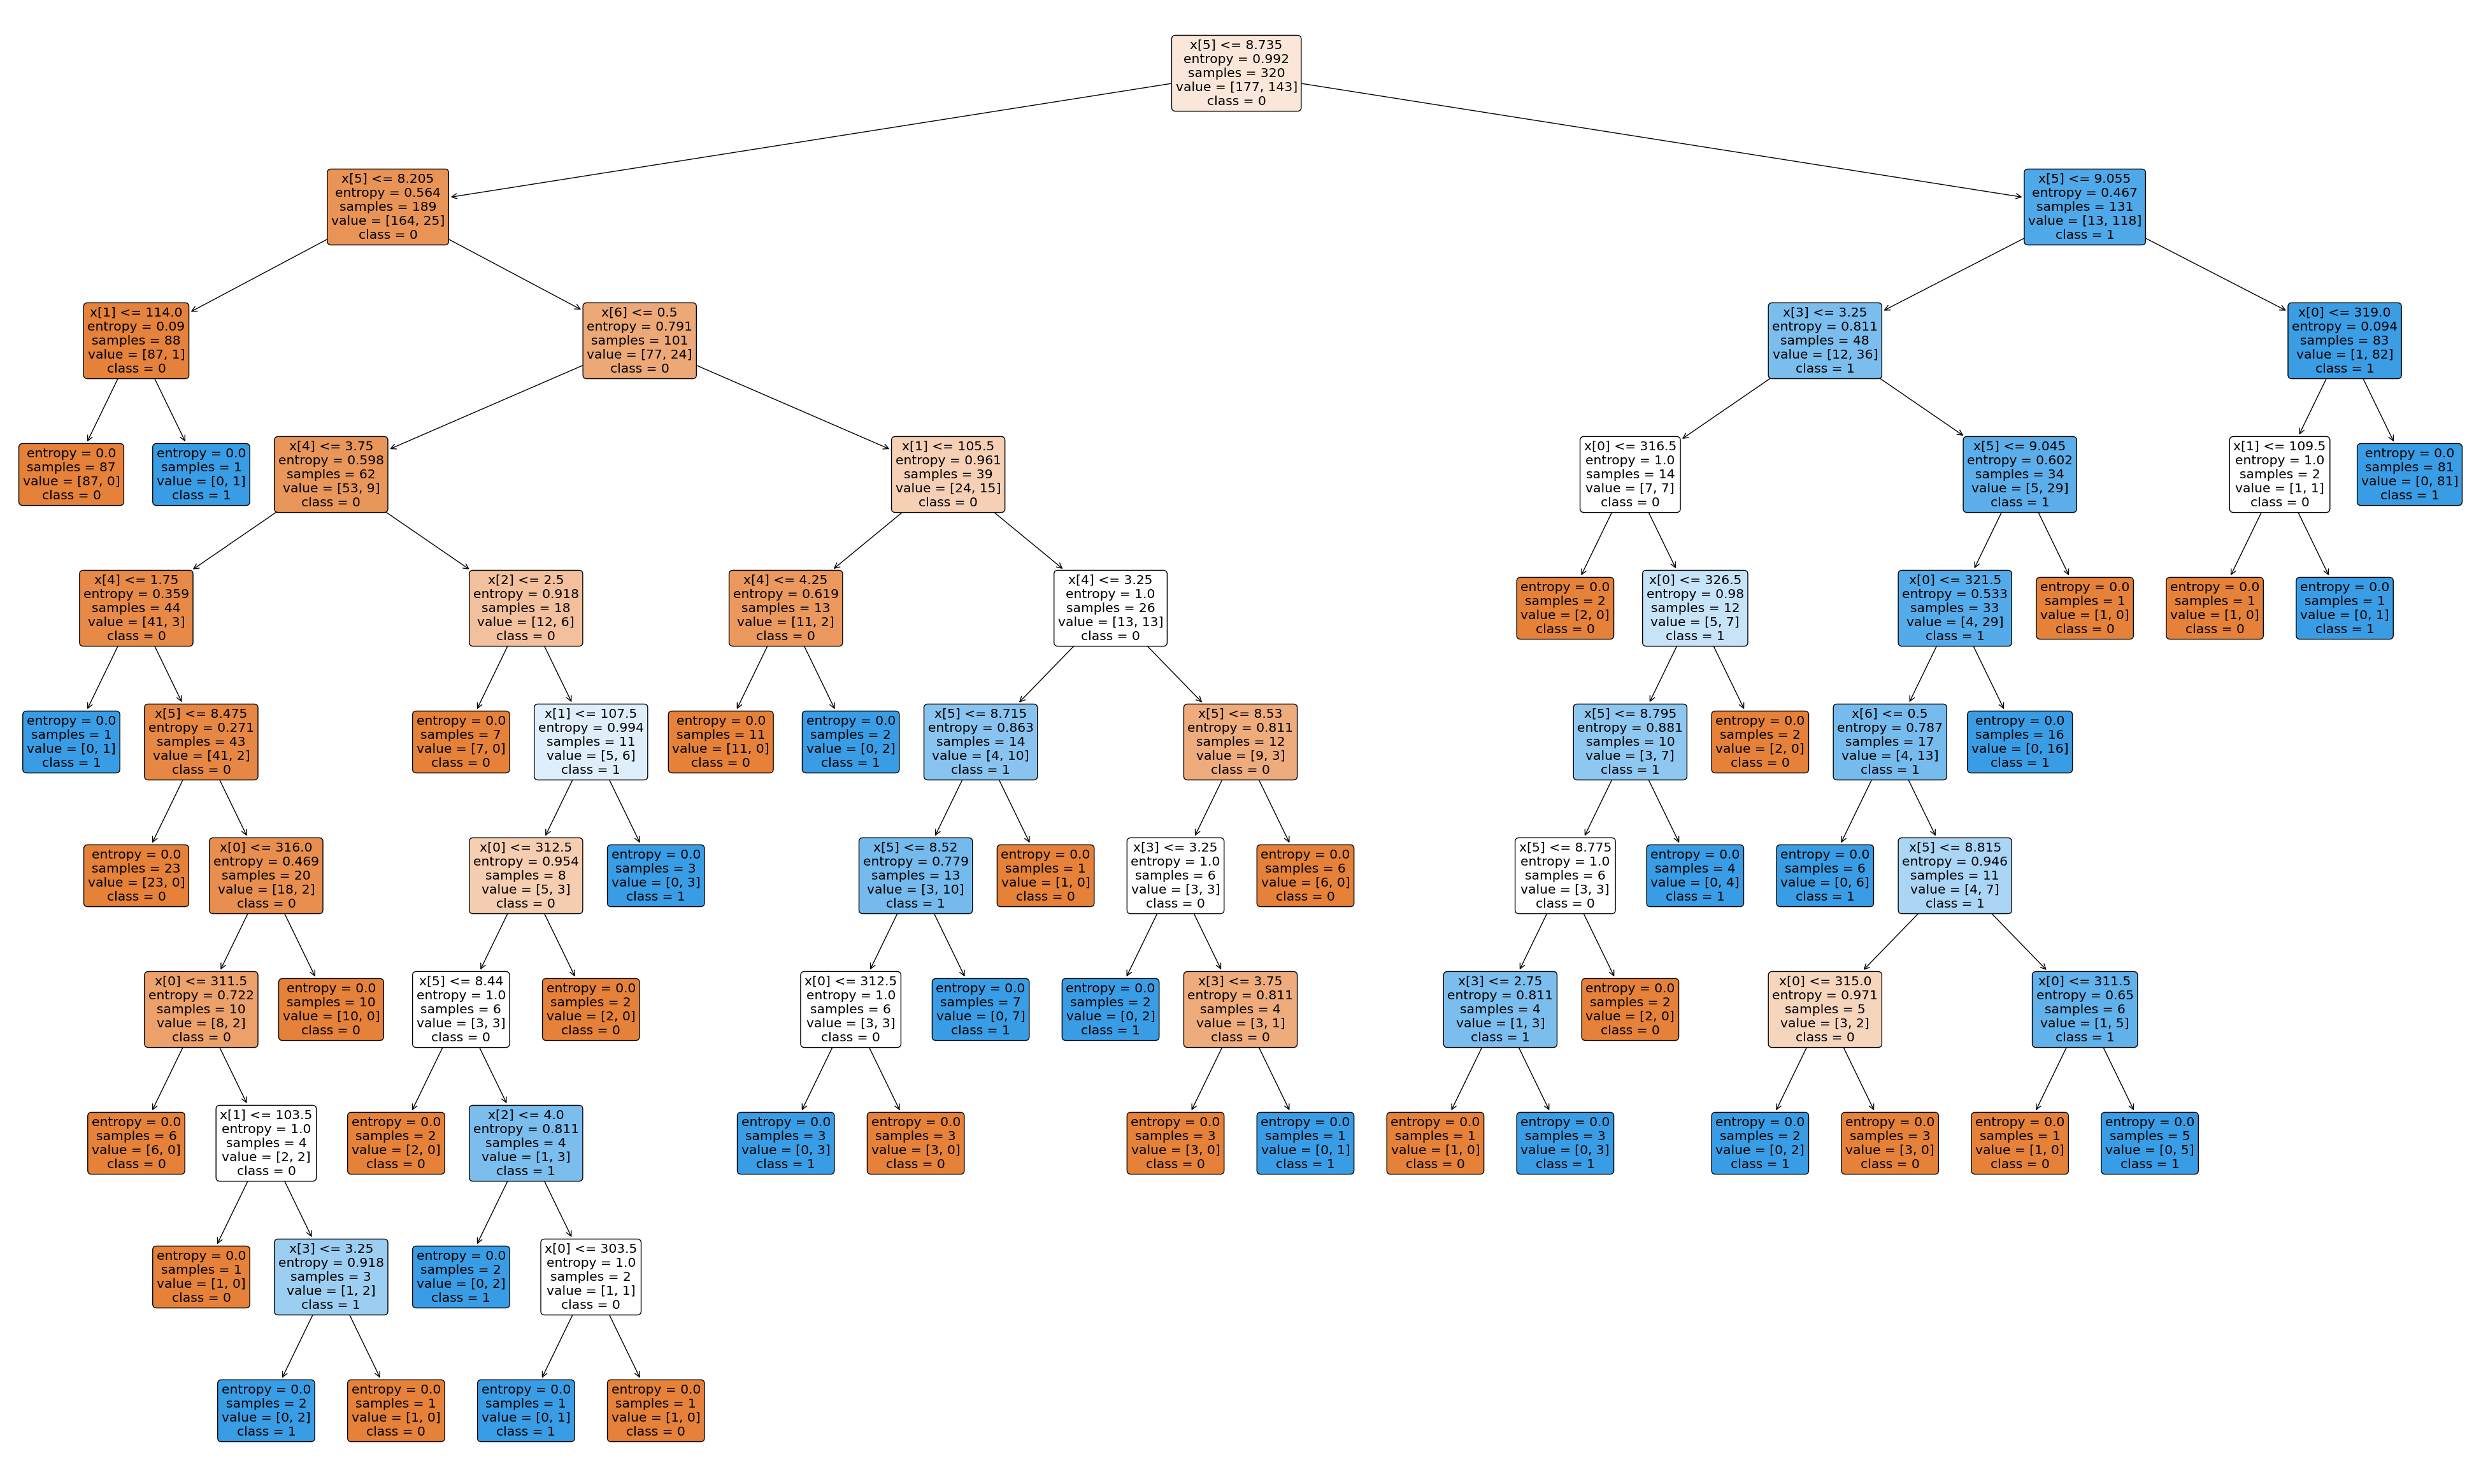

In [206]:
model = DecisionTreeClassifier(random_state=1,criterion='entropy')
model.fit(xtrain, ytrain)
ytest_pred = model.predict(xtest)

plt.figure(figsize = (50,30))
tree.plot_tree(model, rounded = True, filled = True,class_names=['0','1'])
plt.show()

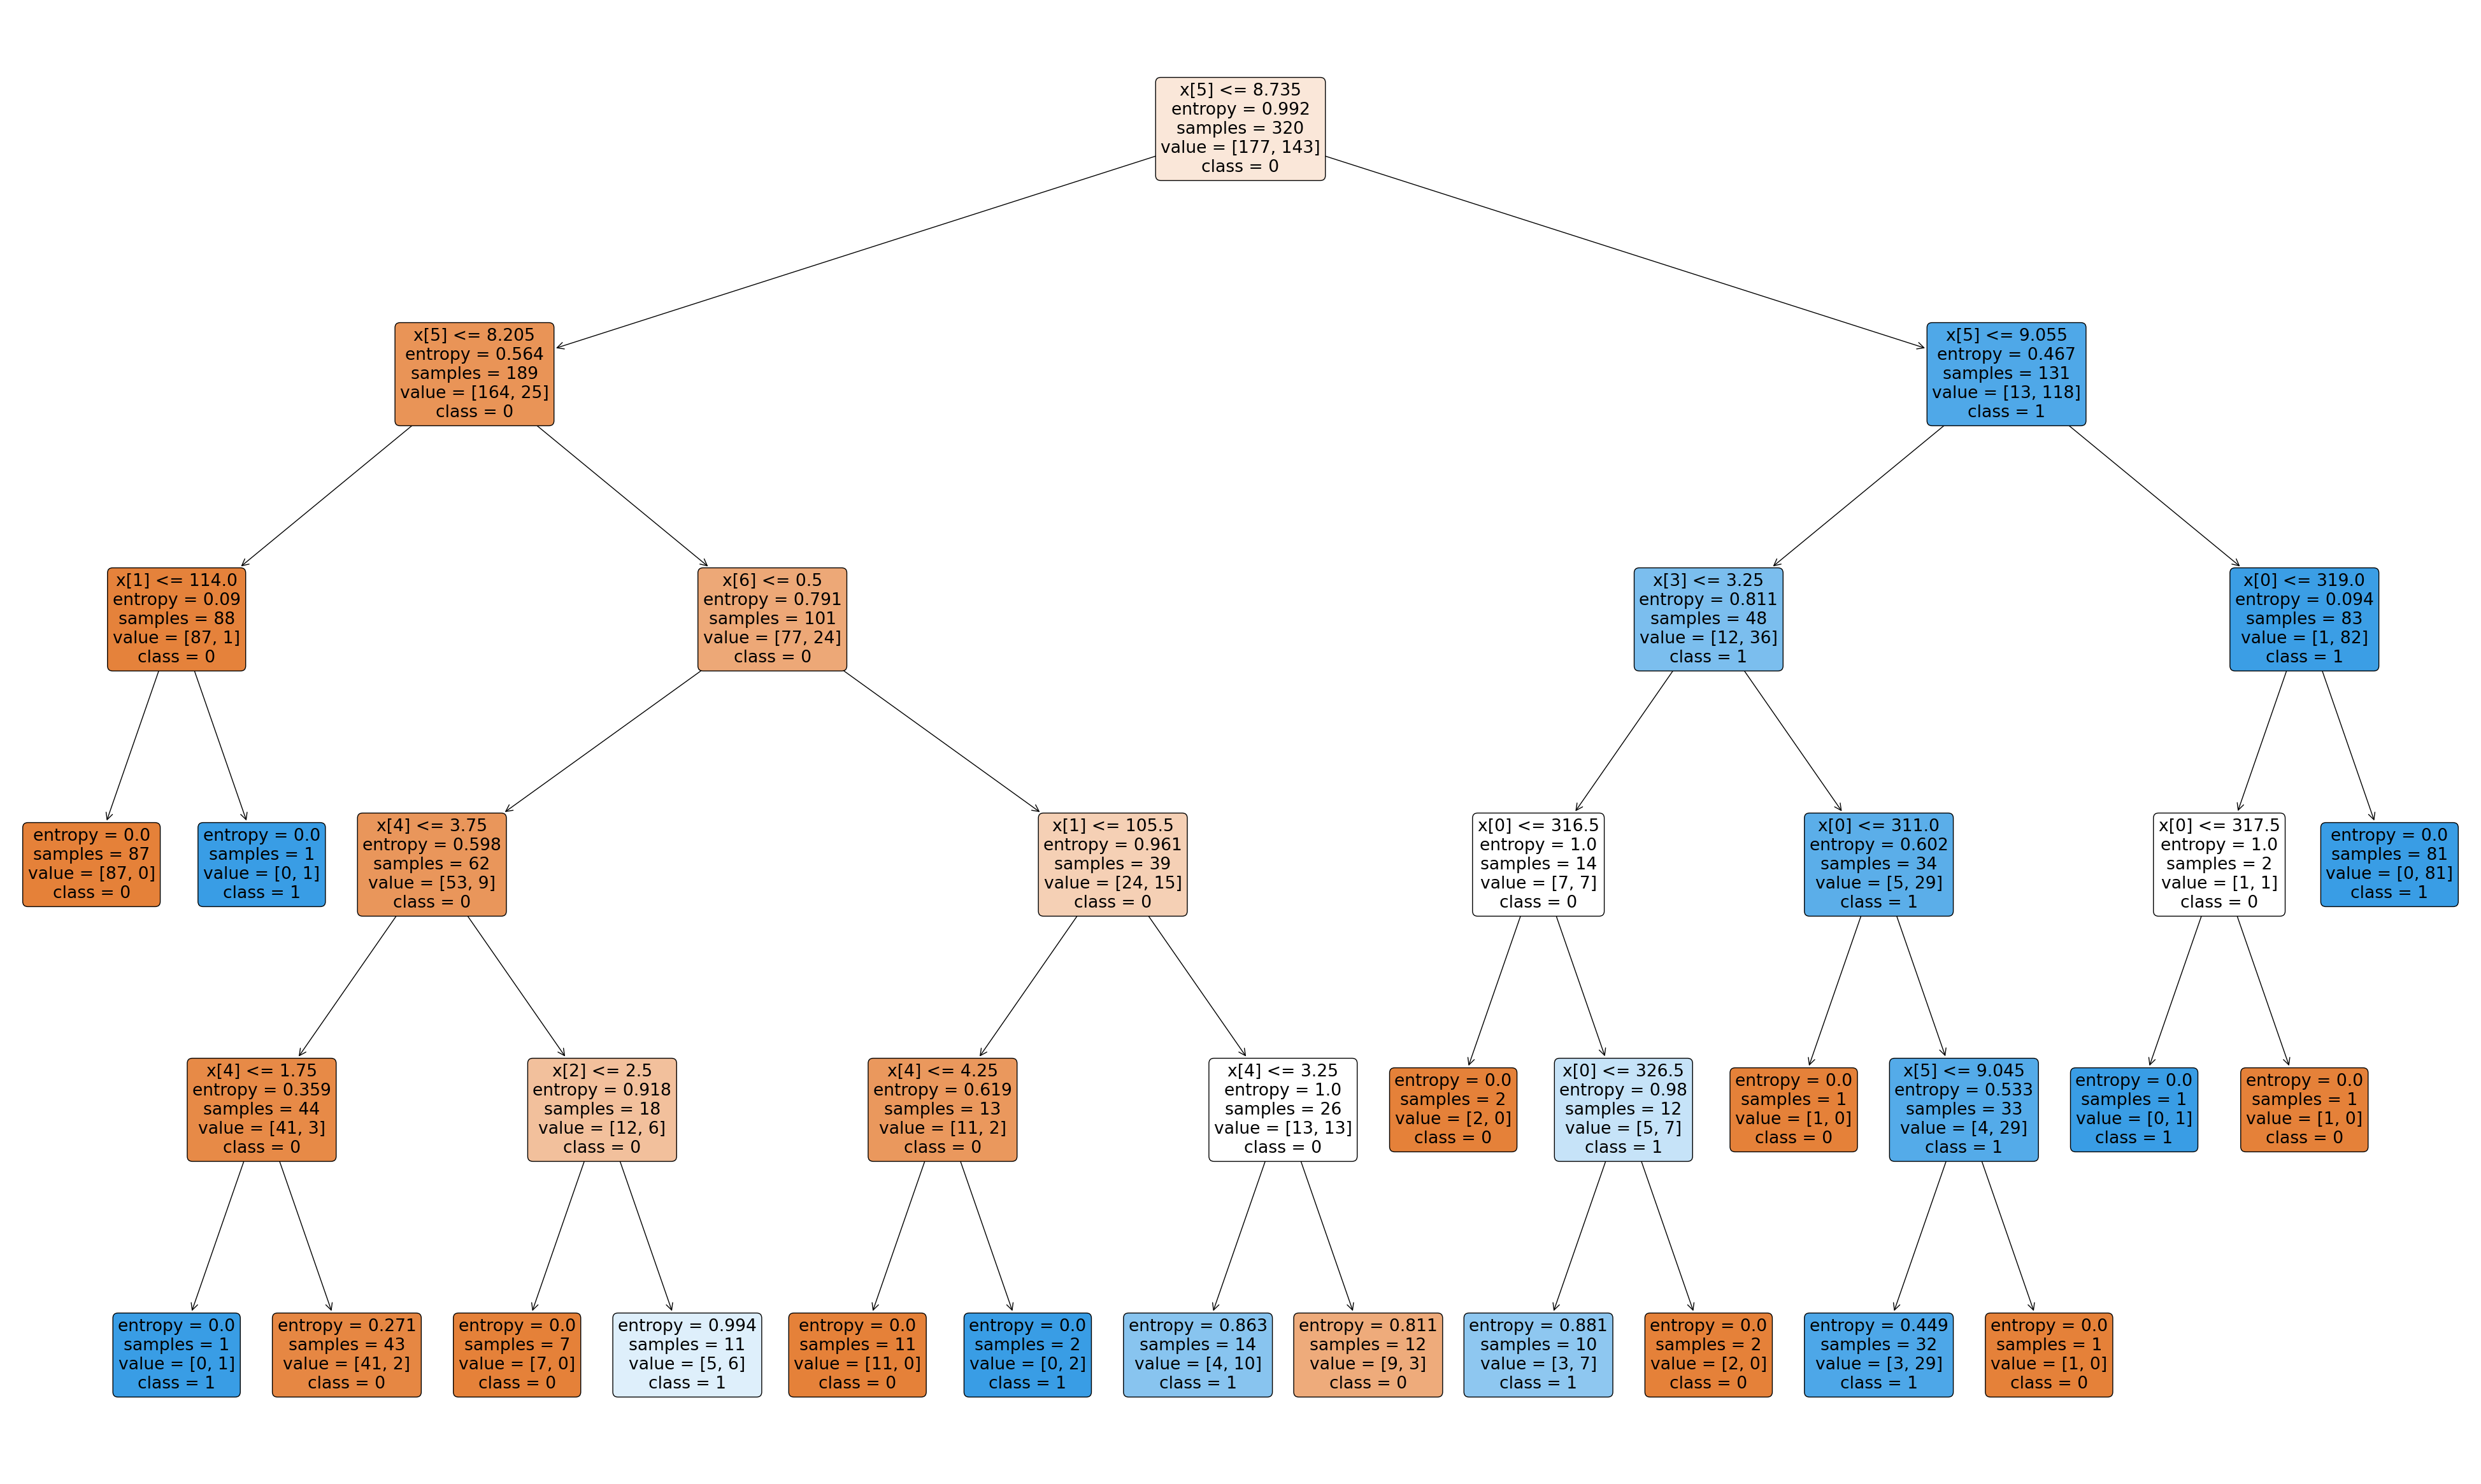

In [207]:
model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=5)
model.fit(xtrain, ytrain)
ytest_pred = model.predict(xtest)

plt.figure(figsize = (50,30))
tree.plot_tree(model, rounded = True, filled = True,class_names=['0','1'])
plt.show()

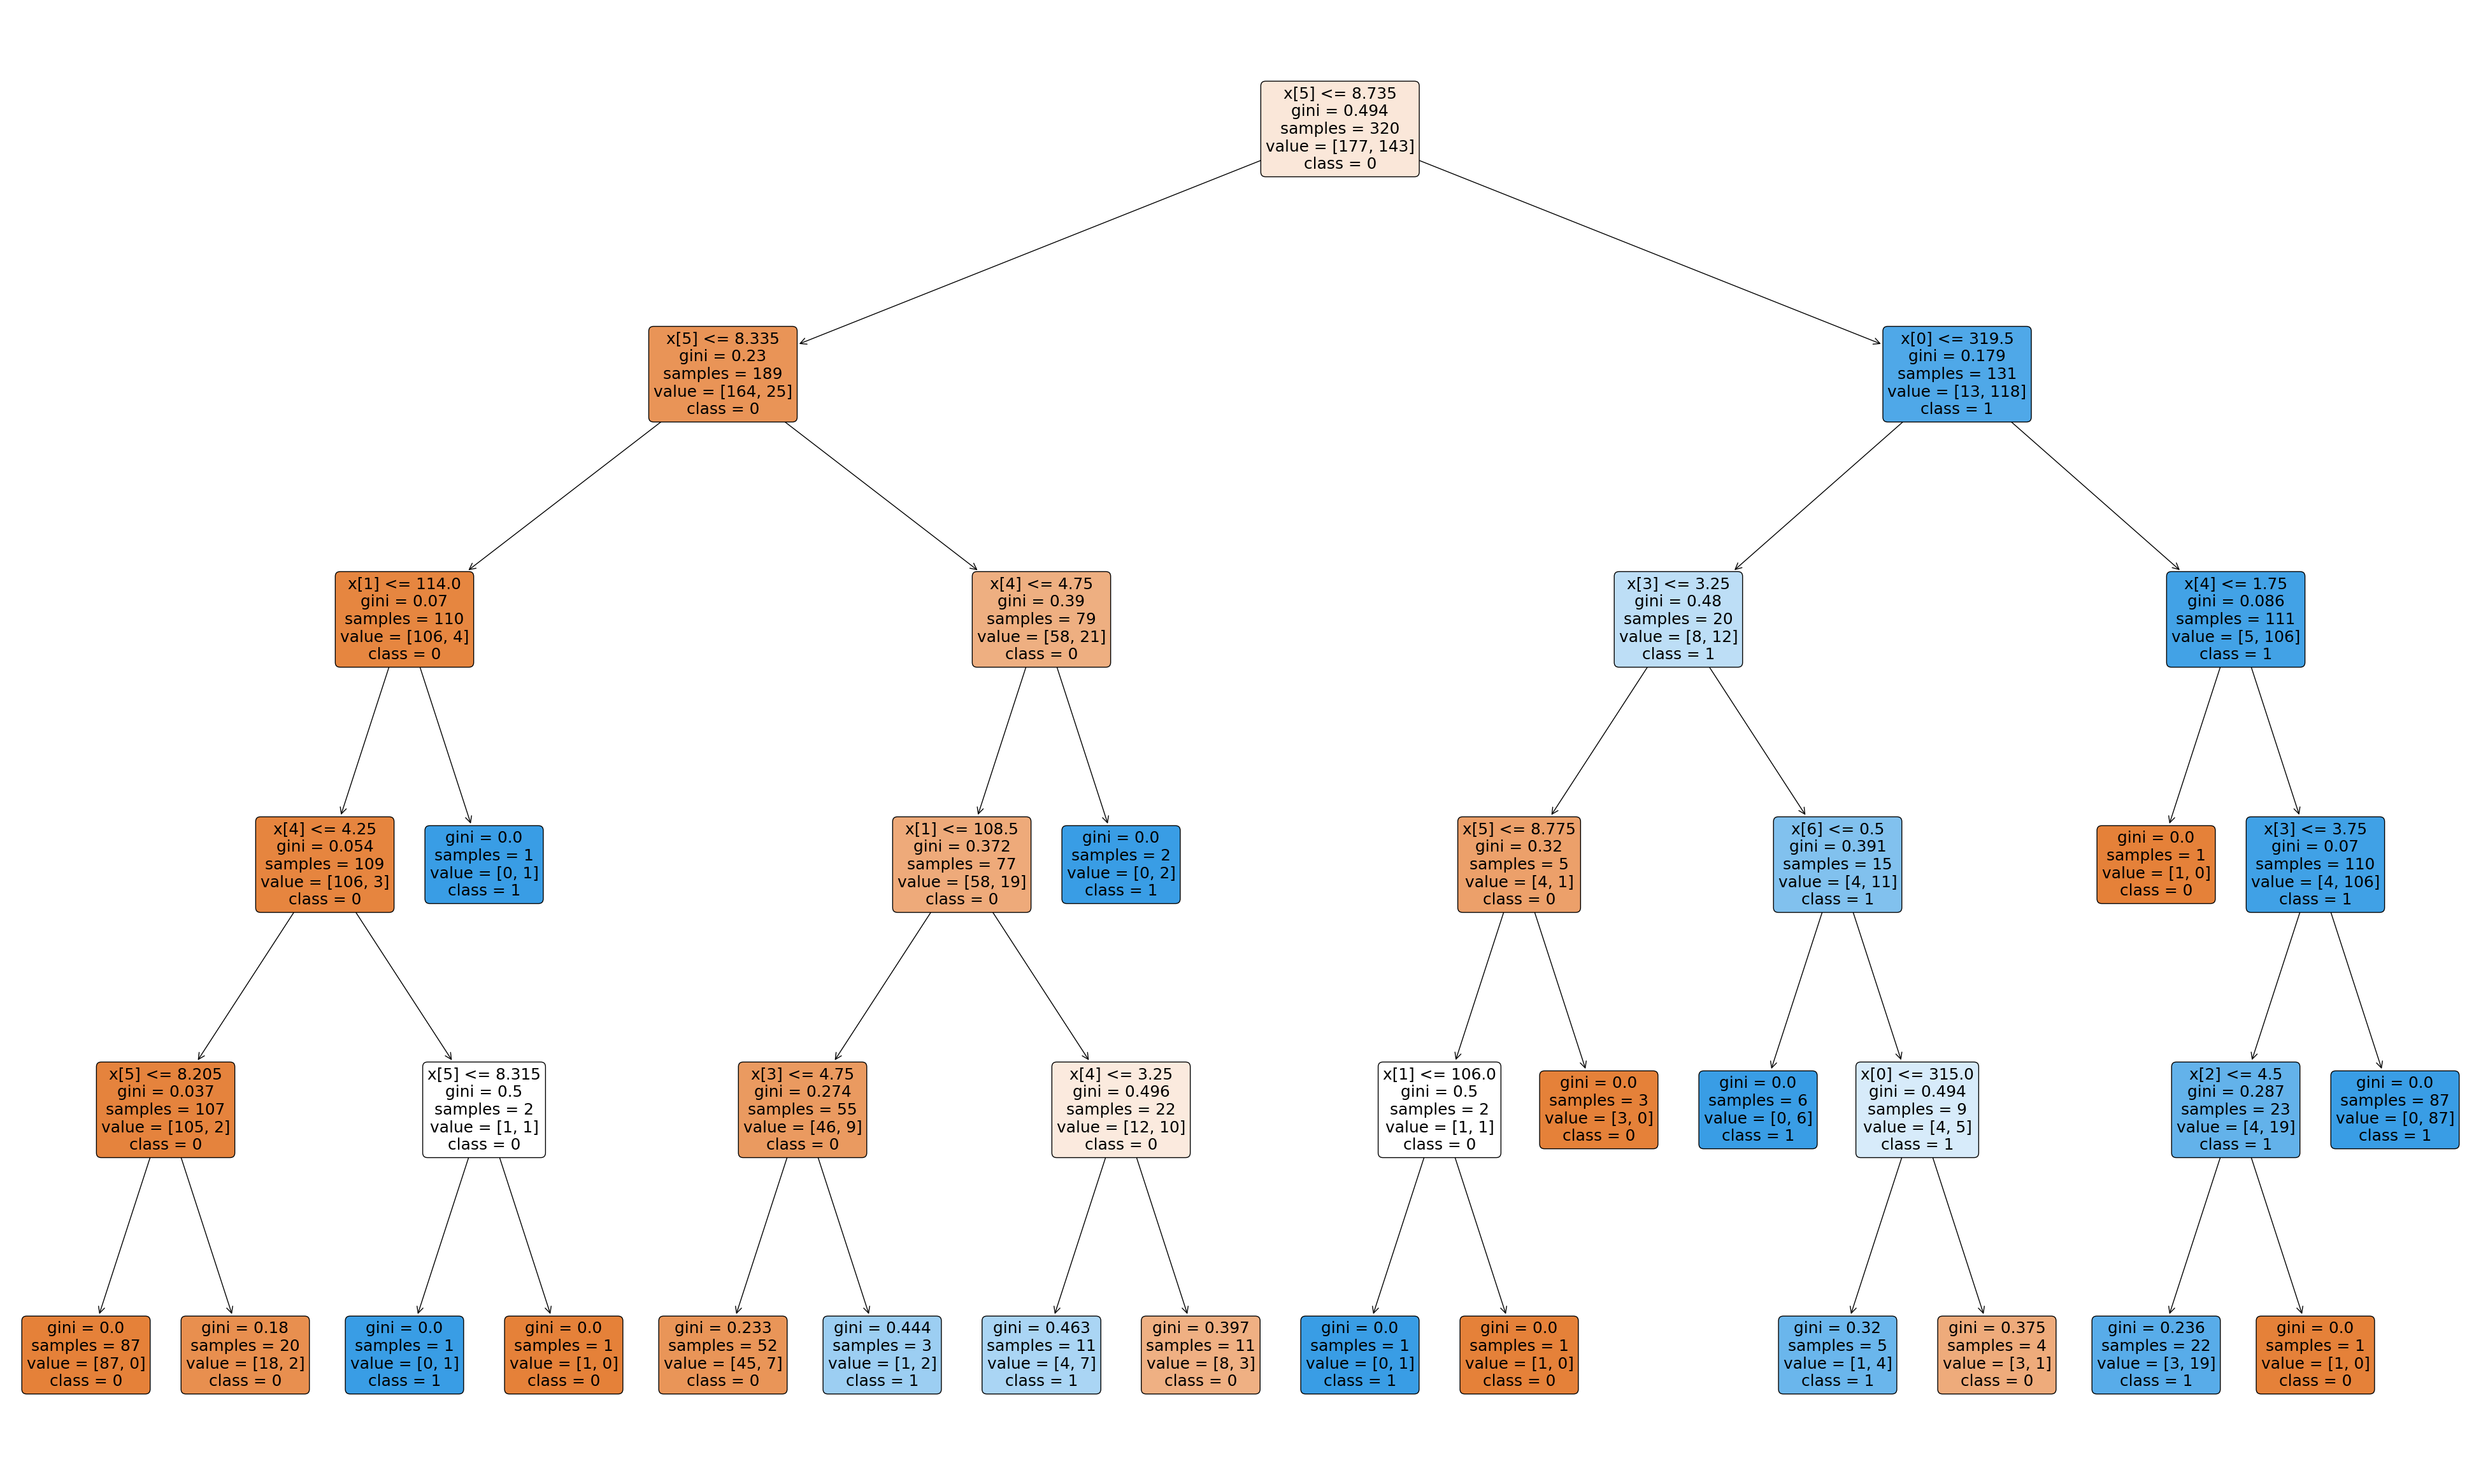

In [208]:
model = DecisionTreeClassifier(random_state=1,max_depth=5)  # previous one is entropy, this one is gini
model.fit(xtrain, ytrain)
ytest_pred = model.predict(xtest)

plt.figure(figsize = (50,30))
tree.plot_tree(model, rounded = True, filled = True,class_names=['0','1'])
plt.show()

In [209]:
model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=5)
model.fit(xtrain, ytrain)
ytest_pred = model.predict(xtest)
accuracy_score(ytest, ytest_pred)

0.8125

In [222]:
model.feature_importances_

array([0.06363433, 0.04535882, 0.02239883, 0.01784984, 0.08441078,
       0.74489572, 0.02145169])

In [211]:
xtrain.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

<Axes: xlabel='Importance', ylabel='Feature'>

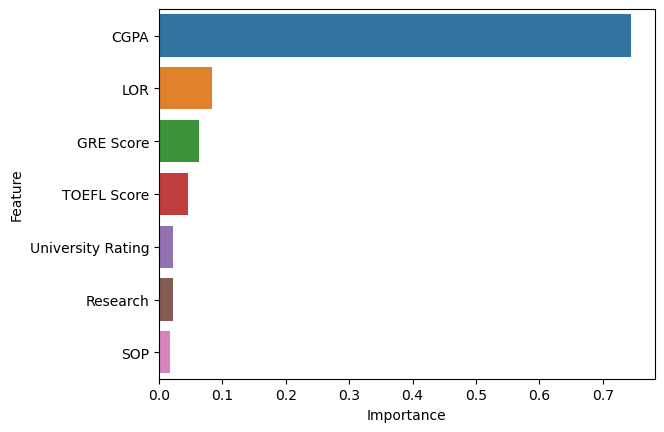

In [212]:
fea_imp = pd.DataFrame({'Feature':xtrain.columns,'Importance':model.feature_importances_})

fea_imp = fea_imp.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance',y = 'Feature',data = fea_imp)

In [190]:

params = {'max_depth': [5,8,7], 'criterion': ['entropy', 'gini']}

dtree = DecisionTreeClassifier(random_state=1)
model = GridSearchCV(dtree, params, scoring= 'accuracy')
model.fit (xtrain,ytrain)
model.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [213]:
ypred_prob = model.predict_proba(xtest)

In [219]:
from sklearn.metrics import roc_auc_score

0.8752357008170962


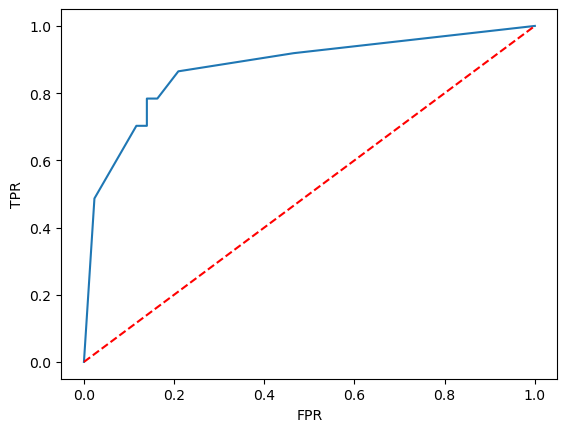

In [221]:
fpr, tpr, threshold = roc_curve (ytest, ypred_prob[:,1])
plt.plot (fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot ([0, 1], [0, 1], 'r--')
print (roc_auc_score(ytest,ypred_prob[:,1]))
plt.show()